 PROBLEM: 
 The dataset comprises various attributes related to customer demographics, purchasing behavior, and satisfaction ratings for an e-commerce platform. Key features include:

CustomerID: Unique identifier for each customer.
Age: Age of the customer.
Gender: Gender of the customer (Male/Female).
PurchaseAmount: Total amount spent by the customer.
PurchaseFrequency: Number of purchases made by the customer.
ProductQualityRating: Customer rating for product quality (1-5).
DeliveryTimeRating: Customer rating for delivery time (1-5).
CustomerServiceRating: Customer rating for customer service (1-5).
WebsiteEaseOfUseRating: Customer rating for website ease of use (1-5).
ReturnRate: Proportion of products returned by the customer.
DiscountUsage: Amount of discount used by the customer.
LoyaltyProgramMember: Whether the customer is a loyalty program member (Yes/No).

Problem :
The primary goal is to perform a comprehensive analysis of customer satisfaction to identify key factors influencing satisfaction and areas needing improvement. This involves:

Understanding Satisfaction Drivers: Identifying which aspects (product quality, delivery time, customer service, website usability) most significantly impact overall customer satisfaction.
Demographic and Behavioral Insights: Analyzing how satisfaction varies across different demographic groups (age, gender) and purchasing behaviors (purchase amount, frequency, discount usage).
Loyalty Program Effectiveness: Evaluating the impact of loyalty program membership on customer satisfaction and retention.
Root Cause Analysis: Identifying the root causes of dissatisfaction to provide actionable recommendations for enhancing customer experience.
Net Promoter Score (NPS): Calculating the NPS to gauge overall customer loyalty and identify areas to convert detractors into promoters.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d = pd.read_csv("E-commerce_NPA_Dataset.csv")
d

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
0,1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
1,2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
2,3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
3,4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
4,5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,25,Female,1331.673244,2,1,4,5,5,0.20,483.526690,No
496,497,53,Male,1031.814050,2,3,3,1,3,0.13,372.031011,Yes
497,498,42,Female,1554.718256,26,5,1,2,3,0.11,373.020405,No
498,499,35,Male,1744.891965,11,2,2,3,2,0.36,414.246263,No


In [4]:
d.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
0,1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
1,2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
2,3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
3,4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
4,5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              500 non-null    int64  
 1   Age                     500 non-null    int64  
 2   Gender                  500 non-null    object 
 3   PurchaseAmount          500 non-null    float64
 4   PurchaseFrequency       500 non-null    int64  
 5   ProductQualityRating    500 non-null    int64  
 6   DeliveryTimeRating      500 non-null    int64  
 7   CustomerServiceRating   500 non-null    int64  
 8   WebsiteEaseOfUseRating  500 non-null    int64  
 9   ReturnRate              500 non-null    float64
 10  DiscountUsage           500 non-null    float64
 11  LoyaltyProgramMember    500 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 47.0+ KB


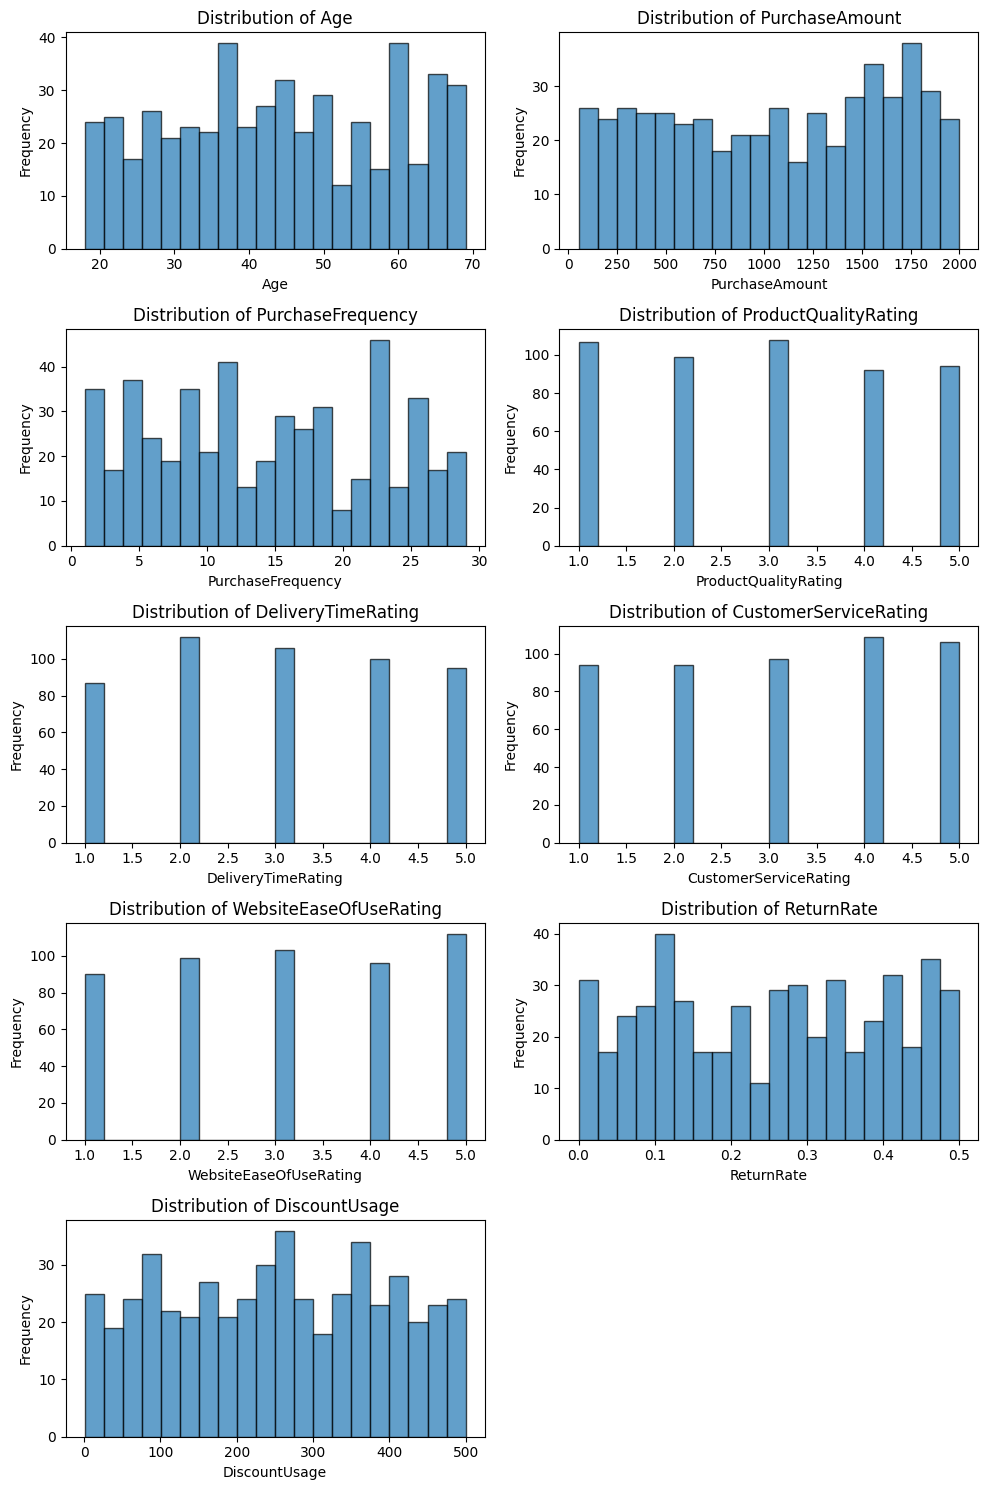

In [11]:

numeric_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']
plt.figure(figsize=(10,15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    plt.hist(d[col], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# create age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
d['AgeGroup'] = pd.cut(d['Age'], bins=bins, labels=labels, right=False)

# select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

# calculate mean ratings by age group and gender
mean_ratings_age_gender = d.groupby(['AgeGroup', 'Gender'])[numeric_columns].mean()

# reset the index to display the dataframe
mean_ratings_age_gender.reset_index(inplace=True)
print(mean_ratings_age_gender)

  AgeGroup  Gender  ProductQualityRating  DeliveryTimeRating  \
0    18-29  Female              3.052632            3.210526   
1    18-29    Male              2.933333            3.000000   
2    30-39  Female              2.929825            2.859649   
3    30-39    Male              3.080000            2.820000   
4    40-49  Female              3.090909            2.890909   
5    40-49    Male              2.857143            3.166667   
6    50-59  Female              2.945946            2.945946   
7    50-59    Male              2.833333            2.895833   
8    60-69  Female              2.900000            3.300000   
9    60-69    Male              2.673469            2.938776   

   CustomerServiceRating  WebsiteEaseOfUseRating  
0               3.175439                2.912281  
1               3.333333                3.355556  
2               2.912281                3.070175  
3               2.980000                2.880000  
4               3.036364                

C:\Users\jetti\AppData\Local\Temp\ipykernel_16388\3342204017.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings_age_gender = d.groupby(['AgeGroup', 'Gender'])[numeric_columns].mean()


In [13]:
# select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

# calculate mean ratings by loyalty program membership
mean_ratings_loyalty = d.groupby('LoyaltyProgramMember')[numeric_columns].mean()

# reset the index to display the dataframe
mean_ratings_loyalty.reset_index(inplace=True)
print(mean_ratings_loyalty)

  LoyaltyProgramMember  ProductQualityRating  DeliveryTimeRating  \
0                   No              2.920502            2.916318   
1                  Yes              2.946360            3.091954   

   CustomerServiceRating  WebsiteEaseOfUseRating  ReturnRate  DiscountUsage  
0               2.987448                3.108787    0.251883     241.426710  
1               3.160920                3.057471    0.252644     260.113108  


nps count [NET PROMOTOR SCORES]

In [14]:
# define NPS categories based on customer service rating
d['NPS_Category'] = pd.cut(d['CustomerServiceRating'], bins=[0, 6, 8, 10], labels=['Detractors', 'Passives', 'Promoters'], right=False)

# calculate NPS
nps_counts = d['NPS_Category'].value_counts(normalize=True) * 100
nps_score = nps_counts['Promoters'] - nps_counts['Detractors']

nps_counts

NPS_Category
Detractors    100.0
Passives        0.0
Promoters       0.0
Name: proportion, dtype: float64

In [33]:
nps_score

-100.0

Root Cause Analysis for Low Satisfaction

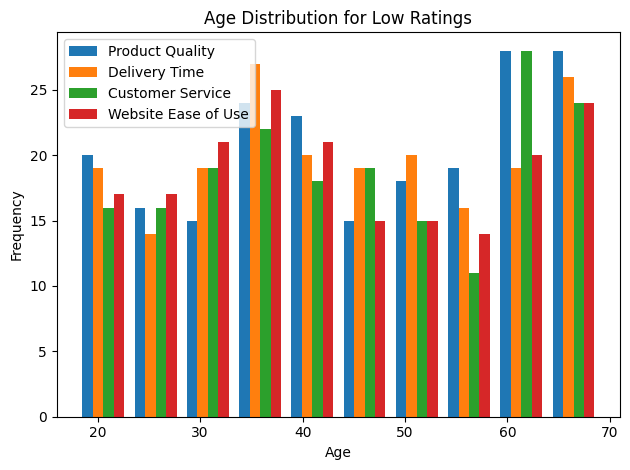

In [32]:
# define low rating threshold
low_rating_threshold = 2

# create subsets for low ratings in different aspects
low_product_quality = d[d['ProductQualityRating'] <= low_rating_threshold]
low_delivery_time = d[d['DeliveryTimeRating'] <= low_rating_threshold]
low_customer_service = d[d['CustomerServiceRating'] <= low_rating_threshold]
low_website_ease_of_use = d[d['WebsiteEaseOfUseRating'] <= low_rating_threshold]

# plot the characteristics for each low rating subset
#plt.figure(figsize=(20, 15))

# age distribution for low ratings
#plt.subplot(2, 2, 1)
plt.hist([low_product_quality['Age'], low_delivery_time['Age'], low_customer_service['Age'], low_website_ease_of_use['Age']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Age Distribution for Low Ratings')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

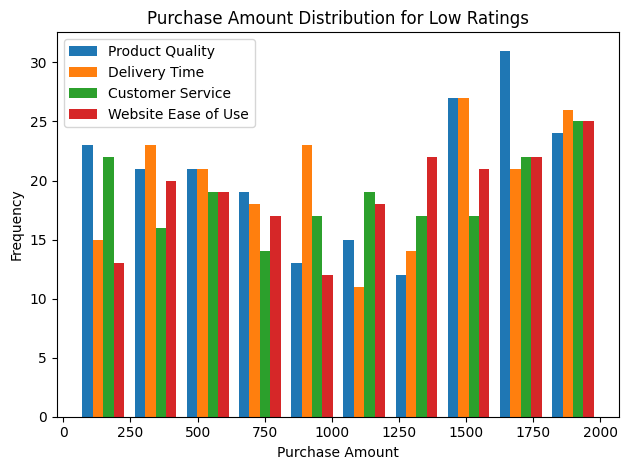

In [28]:

# purchase amount distribution for low ratings
plt.hist([low_product_quality['PurchaseAmount'], low_delivery_time['PurchaseAmount'], low_customer_service['PurchaseAmount'], low_website_ease_of_use['PurchaseAmount']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Amount Distribution for Low Ratings')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

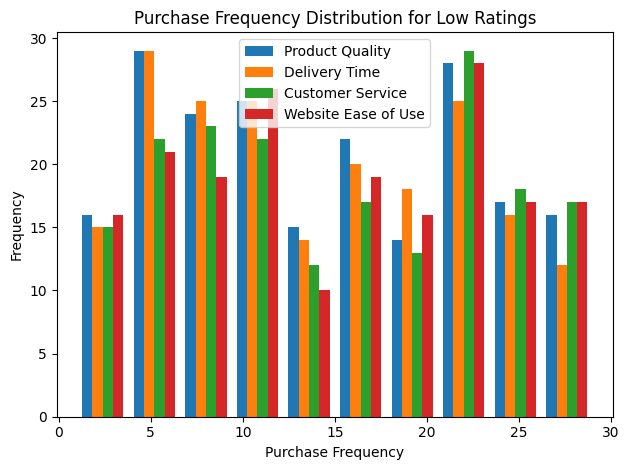

In [29]:
# purchase frequency distribution for low ratings
plt.hist([low_product_quality['PurchaseFrequency'], low_delivery_time['PurchaseFrequency'], low_customer_service['PurchaseFrequency'], low_website_ease_of_use['PurchaseFrequency']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Frequency Distribution for Low Ratings')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

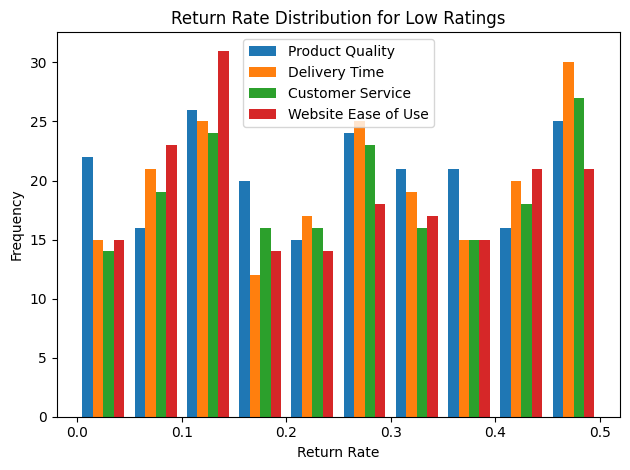

In [27]:
# return rate distribution for low ratings
plt.hist([low_product_quality['ReturnRate'], low_delivery_time['ReturnRate'], low_customer_service['ReturnRate'], low_website_ease_of_use['ReturnRate']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Return Rate Distribution for Low Ratings')
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()